<a href="https://colab.research.google.com/github/zbrze/MOWNIT-python-/blob/master/MOwNiT_lab_%C4%87w_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aproksymacja 

Jako źródło danych proszę wykorzystać te same funkcje i te same zbiory danych jakie były używane w ćwiczeniach dotyczących interpolacji. 
Dodatkowo jako dodatkowe źródło danych proszę wykorzystać publicznie dostępne dane o koronawirusie (active cases):
https://github.com/CSSEGISandData/COVID-19 
Kraj proszę wybrać samodzielnie. Celem tego zadania będzie więc określenie funkcji nalepiej przybliżającej wzrost zachorowań. 


### Zadanie 1 Aproksymacja średniokwadratowa (Least-squares polynomial approximation)
Proszę samodzielnie zaimplementować algorytm aproksymacji wielomianowej średniokwadratowej.  
Dla wszystkich zbiorów danych proszę wykonać odpowiednie wykresy oraz oszacować błąd aproksymacji. 
Testy przeprowadzić dla stopni wielomianów od 1 (regresja liniowa) do n-1. 
Proszę zwięźle podsumować wyniki i podać wnioski co do wyboru najlepszych parametrów aproksymacji. 

##### Zadanie 1a (dla chętnych)
Proszę zwrócić uwagę na dane wygenerowane przez funkcję trygonometryczną i wynik ich aproksymacji. Proszę spróbować zastosować aproksymację środniokwadratową funkcjami trygonometrycznymi. 

### Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python. 



In [0]:
import numpy as np
def lookupTab(fx, steps):
  val_x = np.array(np.linspace(0, 11, steps))
  array_y = np.zeros([steps])
  for i in range(len(val_x)):
    array_y[i] = fx(val_x[i])
  return array_y

In [0]:
import matplotlib.pyplot as plt
def draw(poly):
  p = np.flip(poly.coeffs, axis=0)
  x_axis = np.linspace(0, 10, num=5000)
  y_axis = np.polyval(p, x_axis)
  plt.plot(x_axis, y_axis)
  plt.show()

In [0]:
def getPoints(steps):
    val_x=np.linspace(0, 10, steps)
    points=np.zeros([len(val_x)-1])
    for i in range(len(val_x)-1):
        points[i]=(val_x[i+1]-val_x[i])/2+val_x[i]
    return points

In [0]:
#m - liczba fcji bazowych
def least_squares_aproxy(val_y, val_x, m):
  n = len(val_x)
  matrix_x = np.zeros((m+1, m+1))

  for i in range(m+1):
     for j in range(m+1):
        suma = 0
        pow_x = j + i
        for k in range (n):
          suma += pow(val_x[k], pow_x)
        matrix_x[i][j] = suma

  y = np.linalg.inv(matrix_x)

  coff_tab = [0] * (m + 1)
  for i in range (m + 1):
    for j in range (n):
      coff_tab[i] += pow(val_x[j], i) *val_y[j]

  poly = (np.matmul(coff_tab, y))[::-1]
  poly = np.poly1d(poly)
  return poly

In [0]:
import statistics
def ComparePrecision(fx, m, label):
  points = getPoints(100)
  val_x = np.array(np.linspace(0, 11, 100))
  poly = least_squares_aproxy(lookupTab(fx,100), val_x, m)
  results =  poly(points)
  error = (len(points)) *[0]
  for i in range(0, len(fx(points))):
    error[i] = abs(results[i] - fx((points)[i]))/abs(fx((points)[i]))
 
  plt.plot(points, results, label ='approx' + str(m))
  plt.plot(points, fx(points), 'r--', label=label)
  plt.title('Approximation of ' + label+ 'm= '+ str(m))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()
  print('\033[1m' +"mean of statistic error: ",statistics.mean(error))

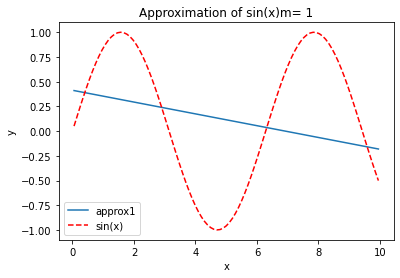

mean of statistic error:  1.1605520045864166





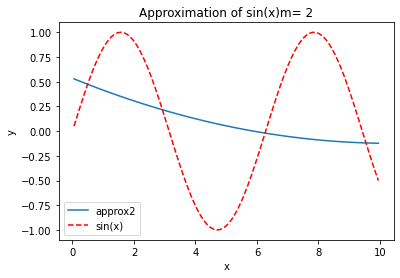

mean of statistic error:  1.1524650311838698





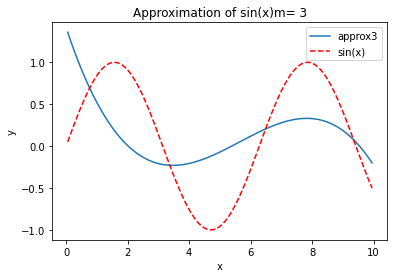

mean of statistic error:  1.2977130756609767





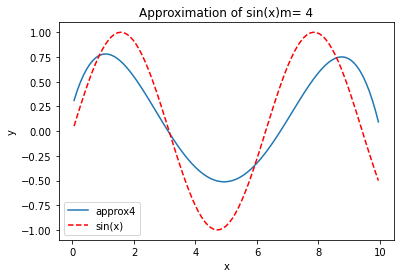

mean of statistic error:  1.1184825506922647





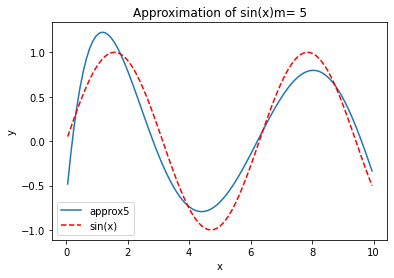

mean of statistic error:  0.6770295935827607





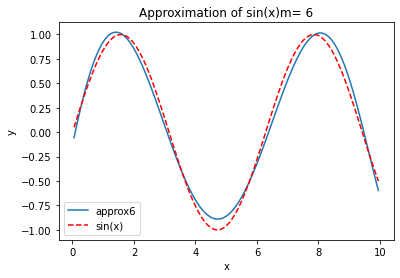

mean of statistic error:  0.2614856481773948





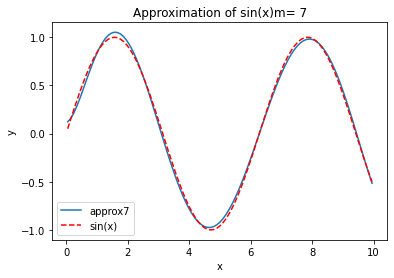

mean of statistic error:  0.10355987299883748





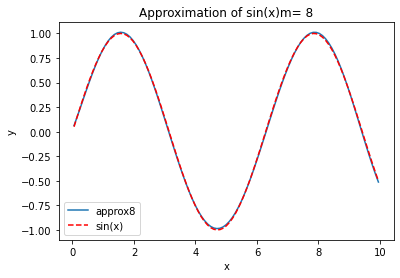

mean of statistic error:  0.04304347992643548





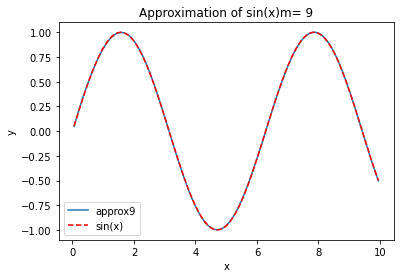

mean of statistic error:  0.008779199567751932





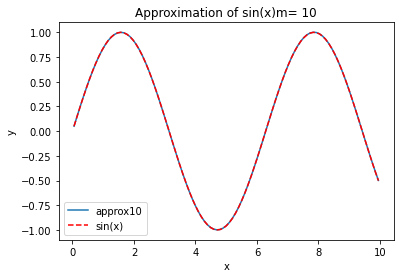

mean of statistic error:  0.0026300258239511792





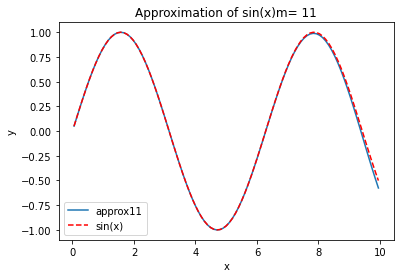

mean of statistic error:  0.05448406800160584


In [62]:

ComparePrecision(lambda x: np.sin(x), 1, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 2, "sin(x)")
print("\n\n")
ComparePrecision(lambda x: np.sin(x), 3, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 4, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 5, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 6, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 7, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 8, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 9, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 10, "sin(x)")

print("\n\n")
ComparePrecision(lambda x: np.sin(x), 11, "sin(x)")

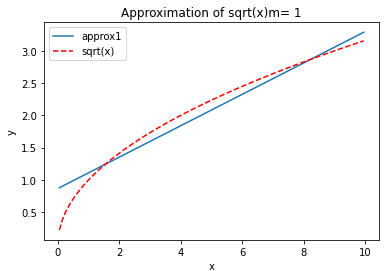

mean of statistic error:  0.11417450084894797





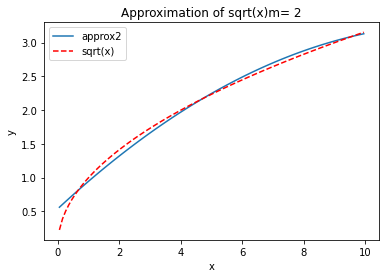

mean of statistic error:  0.04955432315487604





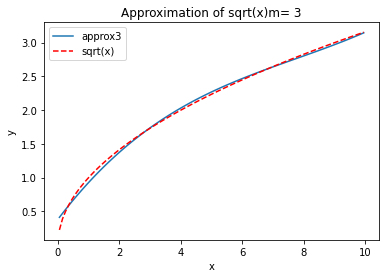

mean of statistic error:  0.027815871395740027





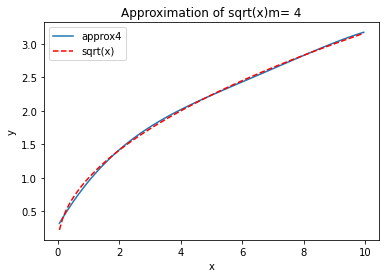

mean of statistic error:  0.0179355644631543





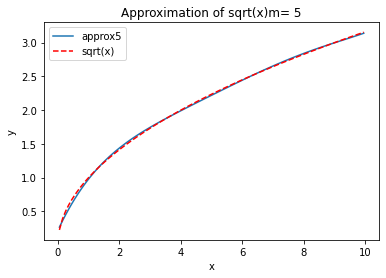

mean of statistic error:  0.013105415537344562





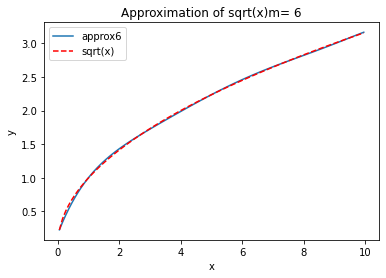

mean of statistic error:  0.00970668215482325





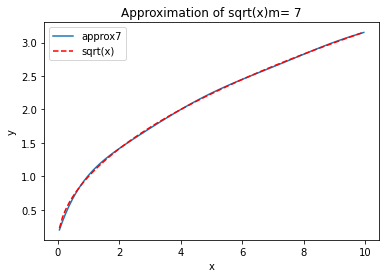

mean of statistic error:  0.009322022669872707





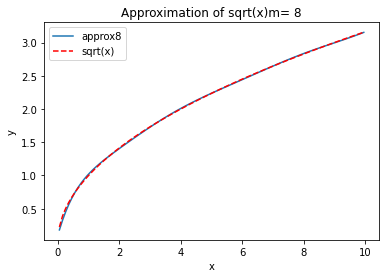

mean of statistic error:  0.00891312533836387





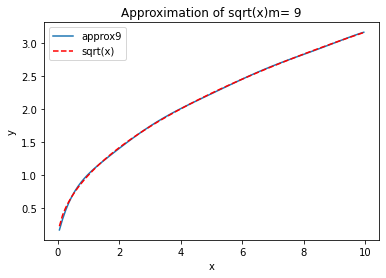

mean of statistic error:  0.00834872792170303





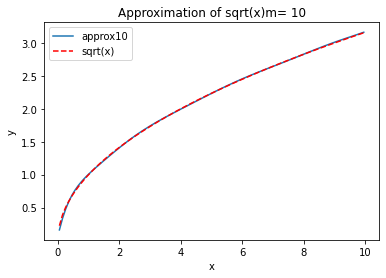

mean of statistic error:  0.008066608187030689





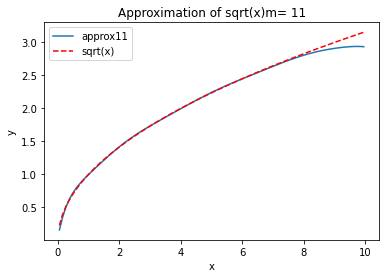

mean of statistic error:  0.014191222703434358


In [63]:

ComparePrecision(lambda x: np.sqrt(x), 1, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 2, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 3, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 4, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 5, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 6, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 7, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 8, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 9, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 10, "sqrt(x)")

print("\n\n")

ComparePrecision(lambda x: np.sqrt(x), 11, "sqrt(x)")

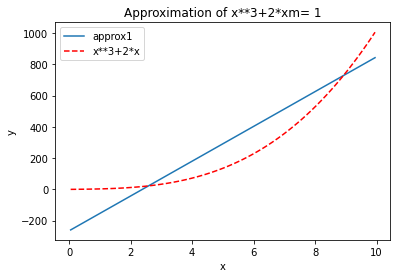

mean of statistic error:  51.558411320514914





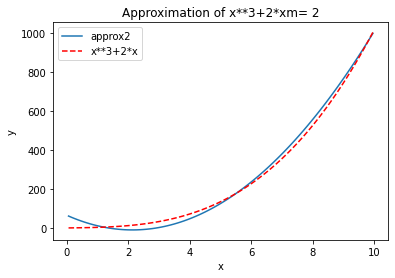

mean of statistic error:  10.63971433363628





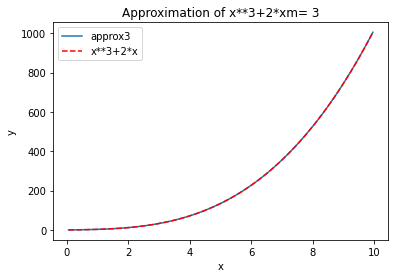

mean of statistic error:  1.4064807322327307e-12





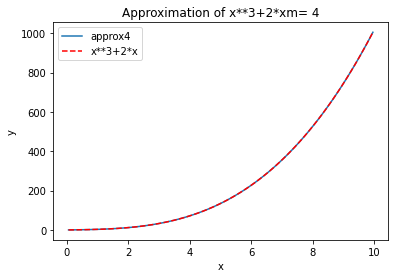

mean of statistic error:  1.2312542459205874e-11





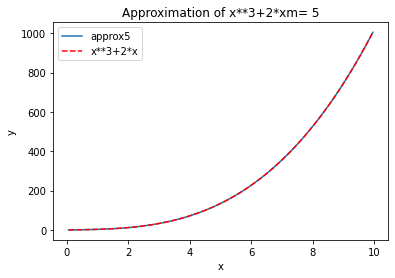

mean of statistic error:  5.1012406941874393e-11





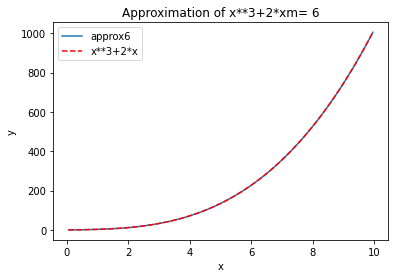

mean of statistic error:  5.550423628247267e-10





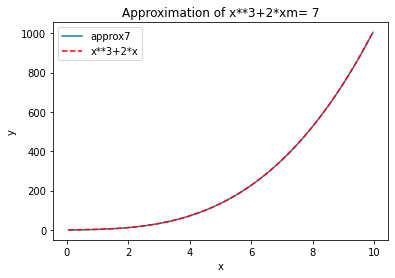

mean of statistic error:  4.059522613689694e-08





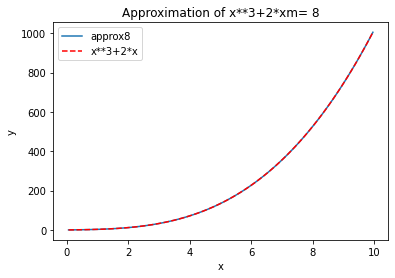

mean of statistic error:  1.3660077730429207e-06





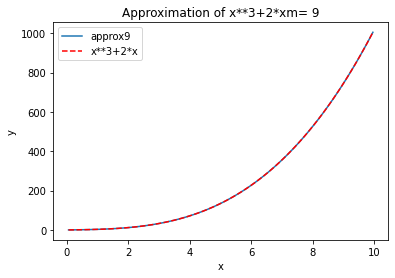

mean of statistic error:  1.8160298406848956e-05





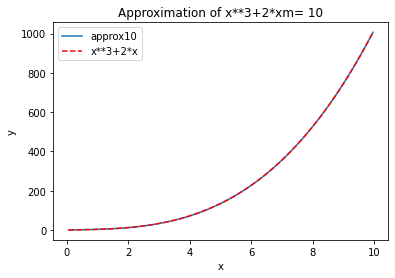

mean of statistic error:  0.00037416369842580634


In [64]:
ComparePrecision(lambda x: (x**3+2*x), 1, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 2, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 3, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 4, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 5, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 6, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 7, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 8, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 9, "x**3+2*x")

print("\n\n")
ComparePrecision(lambda x: (x**3+2*x), 10, "x**3+2*x")

### **WNIOSKI**
Stopień wielomianu (m) znacznie wpływa na dokładność aproksymacji funkcji, jednak jest on również mocno zależny od liczby punktów w których wartość funkcji jest znana. Z moich obserwacji wynika że dla 100 punktów szczyt dokładności osiąga aproksymacja wielomianem o stopniu 10 - błąd dla wielomianów o większym stopniu zaczyna wzrastać. Dlatego uważam, że stopień wielomianu powinien być proporcjonalny do liczby danych punktów.

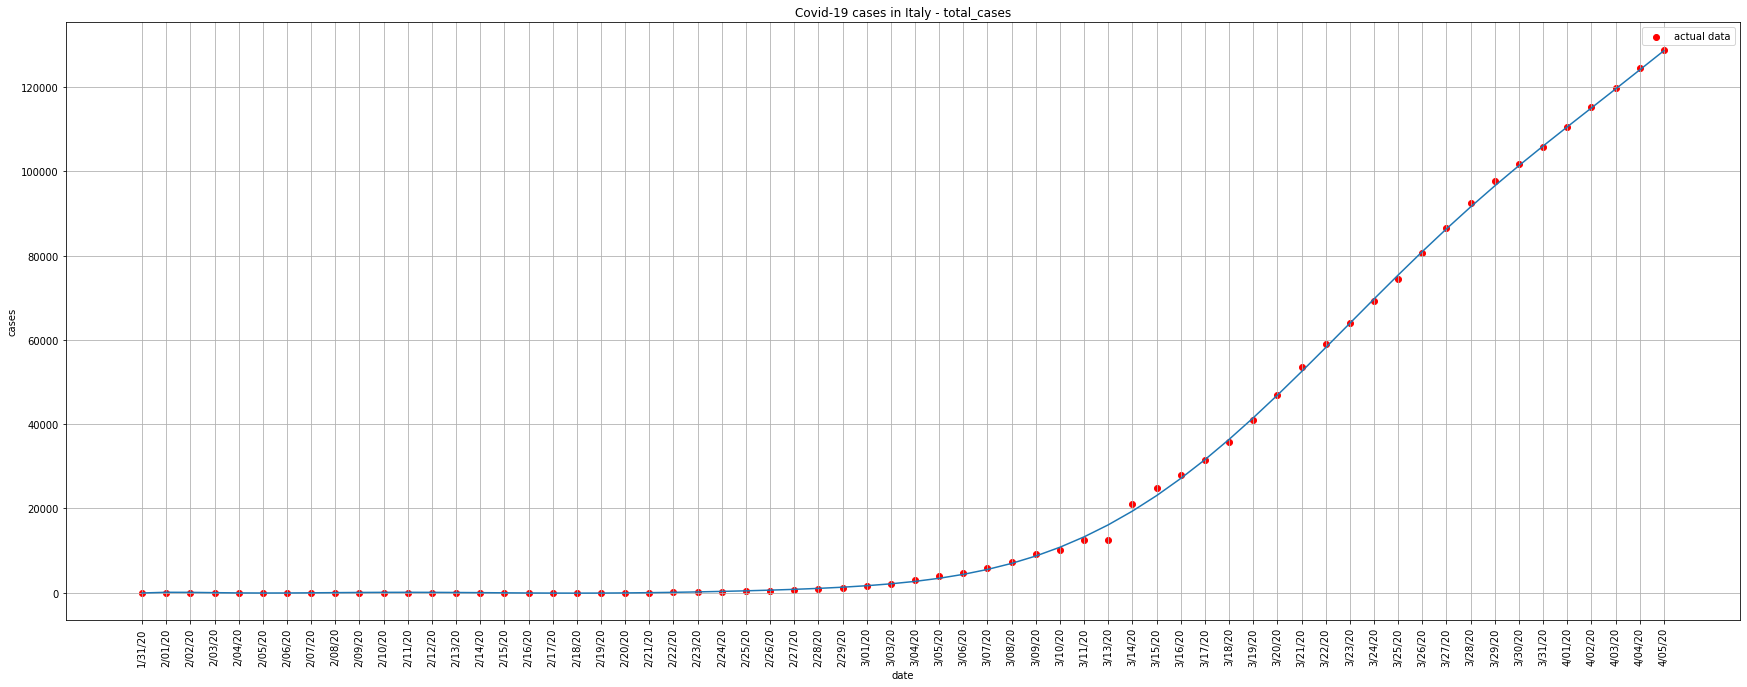

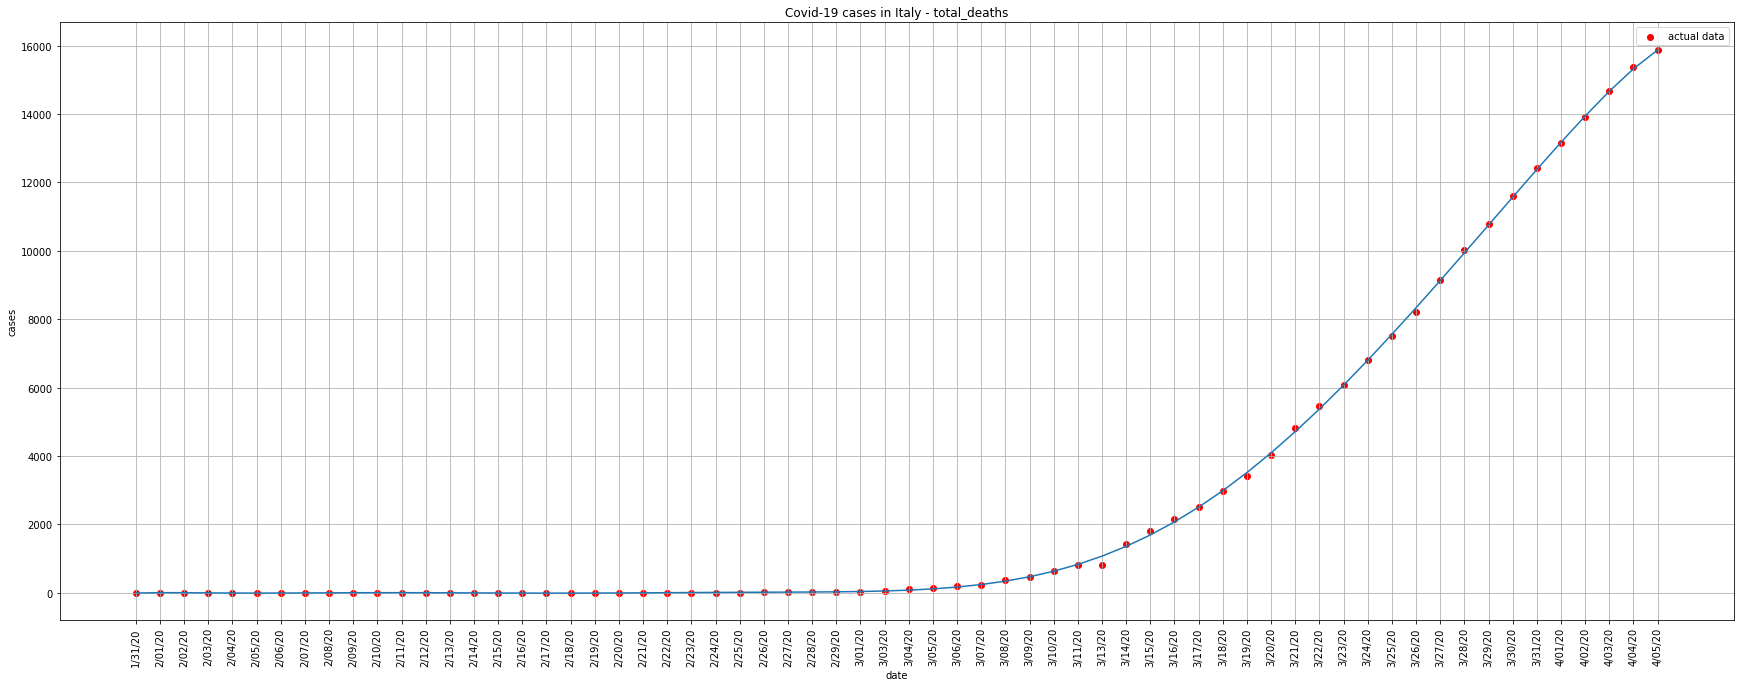

In [65]:
from matplotlib.pyplot import figure
import requests
import json
from contextlib import closing
import csv
import numpy as np
def approximate_corona_curve_italy(m, type):
  response = requests.get('https://api.thevirustracker.com/free-api?countryTimeline=IT')
  data = json.loads(response.text)
  data = data['timelineitems'][0]
  length = len(data)
  counter = 0
  x_val = []
  y_val= []
  for i in data:
        if counter < length - 1:
            y_val.append(data[str(i)][type])
            x_val.append(i)
        counter += 1

  unique, rev = np.unique(x_val, return_inverse=True)
  n = len(y_val)
  poly = least_squares_aproxy(y_val, np.linspace(1, n, n), m)
  results = poly(np.linspace(1, n, n))

  fig,ax=plt.subplots()
  fig.set_size_inches(30, 11)
  ax.plot(rev,results)
  ax.scatter(rev, y_val, c = "red", label="actual data")
  ax.set_xticks(range(len(unique)))
  ax.set_xticklabels(unique)
  plt.title('Covid-19 cases in Italy - ' +type)
  plt.xticks(rotation=90)
  plt.xlabel('date')
  plt.grid(True, which='major')
  plt.ylabel('cases')
  plt.legend()
  plt.show()

approximate_corona_curve_italy(10, "total_cases")
approximate_corona_curve_italy(10, "total_deaths")

### **Zadanie 2 Aproksymacja średniokwadratowa w Python (numpy, scipy)**
Proszę znaleźć i wykorzystać do aproksymacji tych samych danych funkcje dostępne w bibliotekach numerycznych Python.

## **Numpy** **polyfit**

In [0]:
import statistics
def ComparePrecisionPolyFit(fx, m, label):
  points = getPoints(100)
  val_x = np.array(np.linspace(0, 11, 100))
  poly = np.polyfit(val_x, lookupTab(fx,100), m)
  poly = np.poly1d(poly)
  print("polyfit ", poly)
  polym = least_squares_aproxy(lookupTab(fx,100), val_x, m)
  print("\n\n my algorithm:", polym)
  results =  poly(points)
  error = (len(points)) *[0]
  for i in range(0, len(fx(points))):
    error[i] = abs(results[i] - fx((points)[i]))/abs(fx((points)[i]))
 
  plt.plot(points, results, label ='approx' + str(m))
  plt.plot(points, fx(points), 'r--', label=label)
  plt.title('Approximation of ' + label+ ' m= '+ str(m))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()
  print('\033[1m' +"mean of statistic error: ",statistics.mean(error))
  x = np.array(np.linspace(0, 11, 100))

## **sin**(x)

polyfit   
-0.05971 x + 0.4129


 my algorithm:  
-0.05971 x + 0.4129


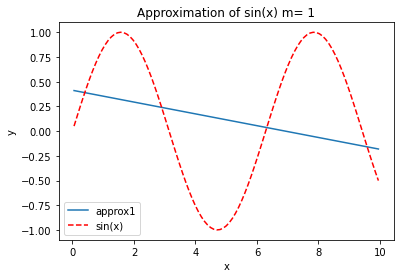

mean of statistic error:  1.1605520045864162





polyfit            2
0.006107 x - 0.1269 x + 0.5348


 my algorithm:           2
0.006107 x - 0.1269 x + 0.5348


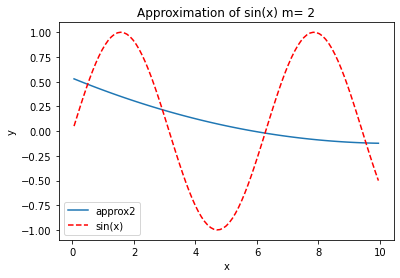

mean of statistic error:  1.1524650311838691





polyfit            3          2
-0.01361 x + 0.2307 x - 1.11 x + 1.414


 my algorithm:           3          2
-0.01361 x + 0.2307 x - 1.11 x + 1.414


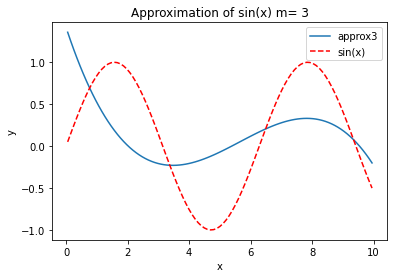

mean of statistic error:  1.2977130756613076





polyfit            4          3         2
-0.00588 x + 0.1158 x - 0.681 x + 1.093 x + 0.2569


 my algorithm:           4          3         2
-0.00588 x + 0.1158 x - 0.681 x + 1.093 x + 0.2569


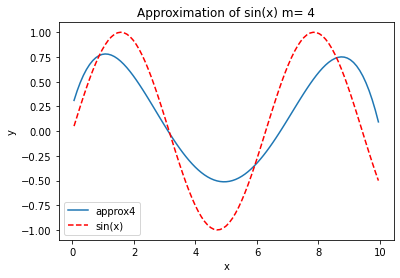

mean of statistic error:  1.118482550694416





polyfit            5           4          3         2
0.001606 x - 0.05004 x + 0.5464 x - 2.445 x + 3.809 x - 0.6692


 my algorithm:           5           4          3         2
0.001606 x - 0.05004 x + 0.5464 x - 2.445 x + 3.809 x - 0.6692


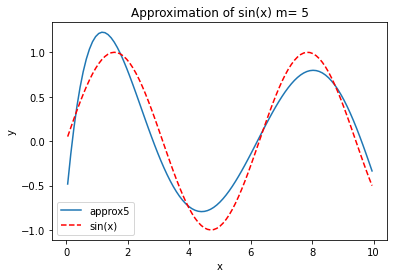

mean of statistic error:  0.6770295936083826





polyfit             6            5           4          3          2
0.0003262 x - 0.009158 x + 0.08425 x - 0.2372 x - 0.3156 x + 1.536 x - 0.1333


 my algorithm:            6            5           4          3          2
0.0003262 x - 0.009158 x + 0.08425 x - 0.2372 x - 0.3156 x + 1.536 x - 0.1333


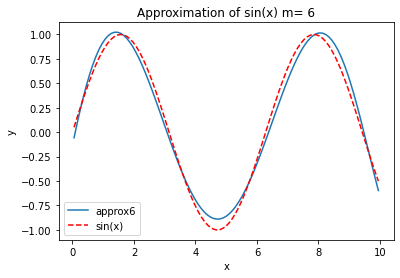

mean of statistic error:  0.261485648626025





polyfit              7           6           5          4         3         2
-5.413e-05 x + 0.00241 x - 0.04085 x + 0.3253 x - 1.193 x + 1.544 x + 0.08107 x + 0.1141


 my algorithm:             7           6           5          4         3         2
-5.413e-05 x + 0.00241 x - 0.04085 x + 0.3253 x - 1.193 x + 1.544 x + 0.08107 x + 0.1141


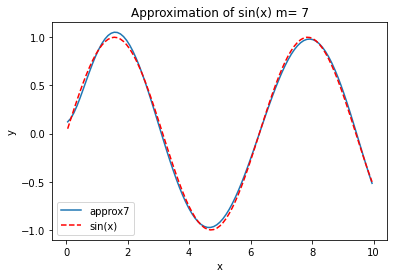

mean of statistic error:  0.1035599040397347





polyfit              8             7            6           5           4
-7.521e-06 x + 0.0002768 x - 0.003528 x + 0.01496 x + 0.03212 x
           3          2
 - 0.3436 x + 0.2996 x + 0.8227 x + 0.02035


 my algorithm:             8             7            6           5           4
-7.521e-06 x + 0.0002768 x - 0.003528 x + 0.01496 x + 0.03212 x
           3          2
 - 0.3436 x + 0.2996 x + 0.8227 x + 0.02035


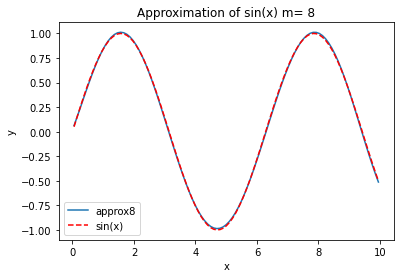

mean of statistic error:  0.04304357335174295





polyfit             9             8            7           6           5
9.156e-07 x - 5.284e-05 x + 0.001214 x - 0.01403 x + 0.08388 x
           4          3          2
 - 0.2362 x + 0.2524 x - 0.3819 x + 1.141 x - 0.01018


 my algorithm:            9             8            7           6          5
9.158e-07 x - 5.285e-05 x + 0.001214 x - 0.01403 x + 0.0839 x
           4          3          2
 - 0.2363 x + 0.2525 x - 0.3821 x + 1.141 x - 0.01019


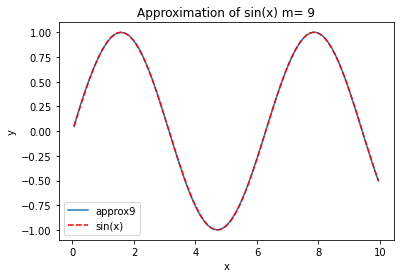

mean of statistic error:  0.008723327499382753





polyfit            10             9             8             7            6
9.78e-08 x  - 4.463e-06 x + 7.316e-05 x - 0.0004248 x - 0.001088 x
           5           4           3           2
 + 0.0203 x - 0.04419 x - 0.08573 x - 0.07175 x + 1.025 x - 0.001597


 my algorithm:           10             9             8             7            6
9.78e-08 x  - 4.464e-06 x + 7.317e-05 x - 0.0004249 x - 0.001087 x
            5           4           3          2
 + 0.02029 x - 0.04417 x - 0.08578 x - 0.0717 x + 1.025 x - 0.001594


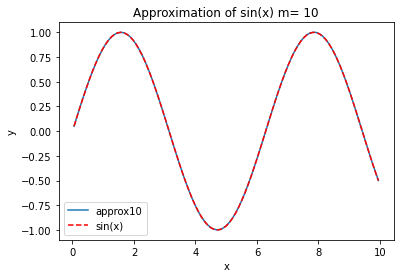

mean of statistic error:  0.002782082843559728





polyfit              11             10             9             8            7
-9.466e-09 x  + 6.705e-07 x  - 1.945e-05 x + 0.0002953 x - 0.002475 x
            6           5           4          3           2
 + 0.01112 x - 0.02669 x + 0.06952 x - 0.2486 x + 0.05067 x + 0.9873 x + 0.0005549


 my algorithm:             11             10             9             8            7
-1.012e-08 x  + 7.104e-07 x  - 2.051e-05 x + 0.0003113 x - 0.002626 x
            6           5           4         3           2
 + 0.01204 x - 0.03032 x + 0.07858 x - 0.262 x + 0.06121 x + 0.9839 x + 0.0007687


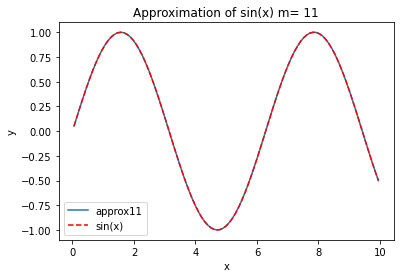

mean of statistic error:  0.0006052177902911153







In [67]:
ComparePrecisionPolyFit(lambda x: np.sin(x), 1, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 2, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 3, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 4, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 5, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 6, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 7, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 8, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 9, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 10, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 11, "sin(x)")
print("\n\n\n\n")

polyfit   
0.2433 x + 0.8665


 my algorithm:  
0.2433 x + 0.8665


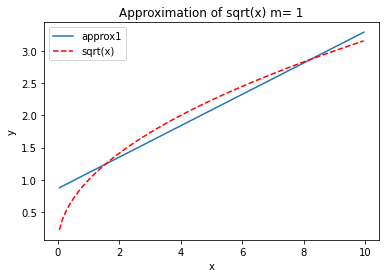

mean of statistic error:  0.11417450084894797





polyfit            2
-0.01638 x + 0.4235 x + 0.5395


 my algorithm:           2
-0.01638 x + 0.4235 x + 0.5395


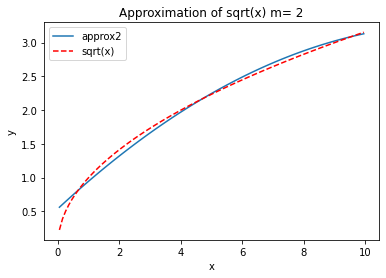

mean of statistic error:  0.04955432315487595





polyfit            3          2
0.002456 x - 0.0569 x + 0.6009 x + 0.381


 my algorithm:           3          2
0.002456 x - 0.0569 x + 0.6009 x + 0.381


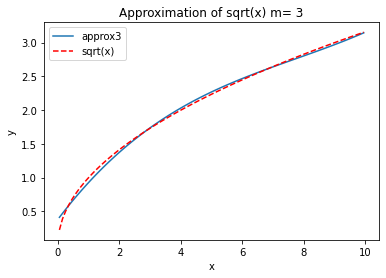

mean of statistic error:  0.02781587139571489





polyfit              4          3          2
-0.0004928 x + 0.0133 x - 0.1333 x + 0.7855 x + 0.2841


 my algorithm:             4          3          2
-0.0004928 x + 0.0133 x - 0.1333 x + 0.7855 x + 0.2841


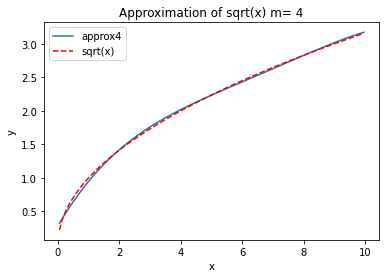

mean of statistic error:  0.01793556446345362





polyfit             5            4           3          2
0.0001158 x - 0.003678 x + 0.04437 x - 0.2605 x + 0.9815 x + 0.2173


 my algorithm:            5            4           3          2
0.0001158 x - 0.003678 x + 0.04437 x - 0.2605 x + 0.9815 x + 0.2173


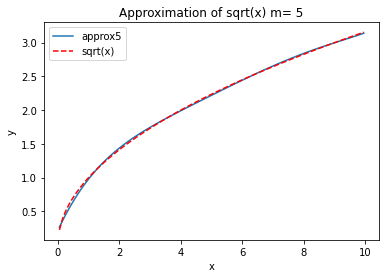

mean of statistic error:  0.013105415536199937





polyfit              6            5           4          3          2
-3.002e-05 x + 0.001106 x - 0.01604 x + 0.1165 x - 0.4565 x + 1.191 x + 0.1679


 my algorithm:             6            5           4          3          2
-3.002e-05 x + 0.001106 x - 0.01604 x + 0.1165 x - 0.4565 x + 1.191 x + 0.1679


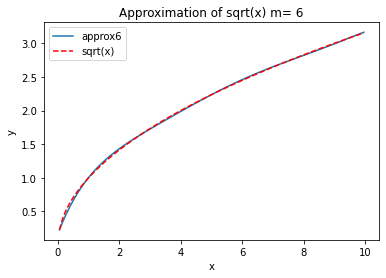

mean of statistic error:  0.009706682100977209





polyfit             7            6            5           4          3
8.285e-06 x - 0.000349 x + 0.005957 x - 0.05294 x + 0.2628 x
           2
 - 0.7412 x + 1.413 x + 0.1301


 my algorithm:            7            6            5           4          3
8.285e-06 x - 0.000349 x + 0.005957 x - 0.05294 x + 0.2628 x
           2
 - 0.7412 x + 1.413 x + 0.1301


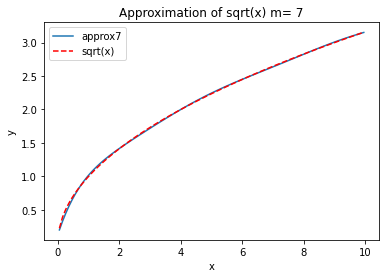

mean of statistic error:  0.00932203233890132





polyfit              8             7            6           5          4
-2.383e-06 x + 0.0001132 x - 0.002231 x + 0.02364 x - 0.1458 x
           3         2
 + 0.5321 x - 1.136 x + 1.648 x + 0.1004


 my algorithm:             8             7            6           5          4
-2.383e-06 x + 0.0001132 x - 0.002231 x + 0.02364 x - 0.1459 x
           3         2
 + 0.5321 x - 1.136 x + 1.648 x + 0.1004


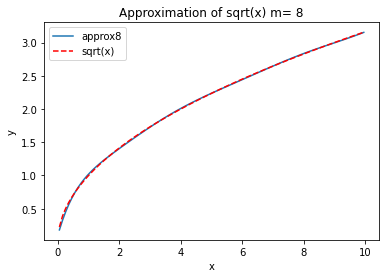

mean of statistic error:  0.008912919192530018





polyfit             9             8             7           6           5
7.044e-07 x - 3.725e-05 x + 0.0008343 x - 0.01031 x + 0.07667 x
           4          3        2
 - 0.3523 x + 0.9906 x - 1.66 x + 1.893 x + 0.07689


 my algorithm:            9             8             7           6           5
7.046e-07 x - 3.726e-05 x + 0.0008345 x - 0.01031 x + 0.07669 x
           4          3        2
 - 0.3524 x + 0.9908 x - 1.66 x + 1.894 x + 0.07688


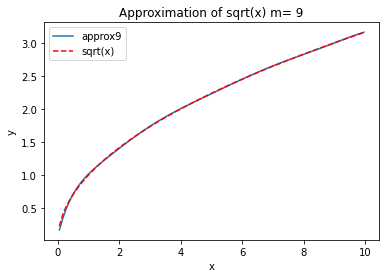

mean of statistic error:  0.008356836355254114





polyfit              10             9             8            7           6
-2.118e-07 x  + 1.236e-05 x - 0.0003102 x + 0.004384 x - 0.03833 x
           5          4         3         2
 + 0.2144 x - 0.7683 x + 1.723 x - 2.332 x + 2.146 x + 0.0583


 my algorithm:             10            9             8            7           6
-2.125e-07 x  + 1.24e-05 x - 0.0003111 x + 0.004397 x - 0.03843 x
           5          4         3         2
 + 0.2149 x - 0.7699 x + 1.726 x - 2.335 x + 2.147 x + 0.05821


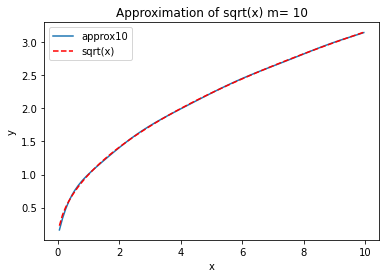

mean of statistic error:  0.007782097173278155







In [68]:
ComparePrecisionPolyFit(lambda x: np.sqrt(x), 1, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 2, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 3, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 4, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 5, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 6, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 7, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 8, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 9, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 10, "sqrt(x)")
print("\n\n\n\n")

polyfit   
111.3 x - 264.8


 my algorithm:  
111.3 x - 264.8


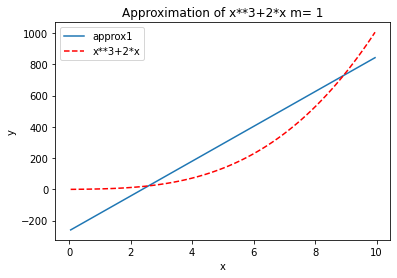

mean of statistic error:  51.55841132051459





polyfit        2
16.5 x - 70.24 x + 64.55


 my algorithm:       2
16.5 x - 70.24 x + 64.55


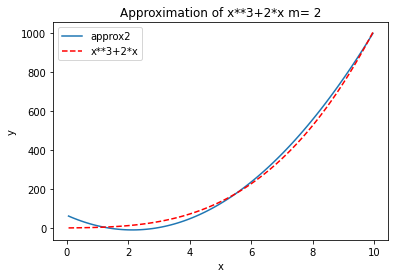

mean of statistic error:  10.639714333636476





polyfit     3             2
1 x + 1.822e-14 x + 2 x + 1.368e-13


 my algorithm:    3             2
1 x + 1.819e-12 x + 2 x + 7.276e-12


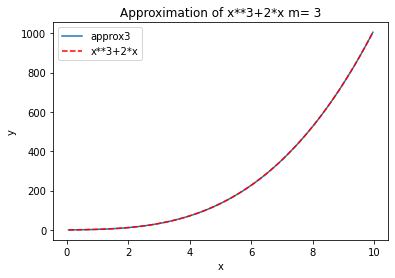

mean of statistic error:  2.3735270188109984e-14





polyfit             4     3            2
2.902e-16 x + 1 x + 3.67e-14 x + 2 x + 2.274e-14


 my algorithm:    3             2
1 x + 1.455e-11 x + 2 x - 1.455e-11


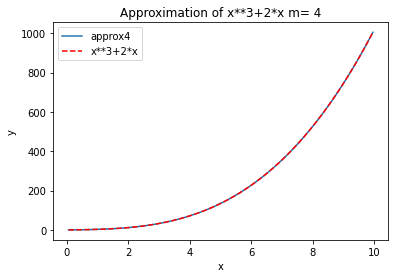

mean of statistic error:  4.208492123754354e-15





polyfit             5             4     3             2
-2.69e-17 x + 5.585e-16 x + 1 x + 2.189e-14 x + 2 x + 1.08e-13


 my algorithm:            5             4     3             2
1.137e-13 x - 1.091e-11 x + 1 x - 2.328e-10 x + 2 x - 1.164e-10


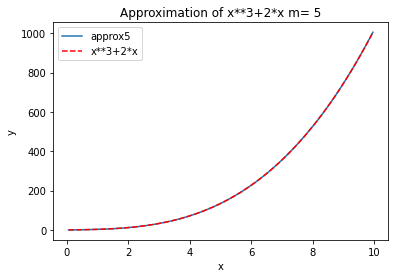

mean of statistic error:  2.7786937309360384e-14





polyfit             6             5             4     3             2
3.461e-17 x - 1.273e-15 x + 1.802e-14 x + 1 x + 4.081e-13 x + 2 x + 1.876e-13


 my algorithm:            6             5             4     3
1.137e-13 x - 1.455e-11 x - 5.821e-11 x + 1 x + 2 x + 1.164e-09


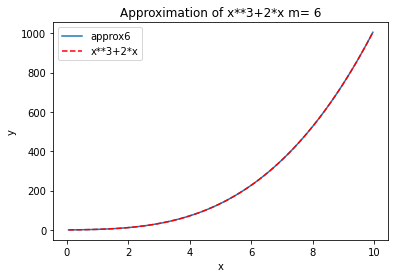

mean of statistic error:  2.451762688522995e-14





polyfit             7             6             5             4     3
3.628e-18 x - 1.226e-16 x + 1.574e-15 x - 9.644e-15 x + 1 x
              2
 - 3.712e-14 x + 2 x + 1.592e-13


 my algorithm:            7             6             5             4     3
4.547e-13 x - 1.455e-11 x + 4.657e-10 x + 1.863e-09 x + 1 x
             2
 - 1.49e-08 x + 2 x - 1.863e-09


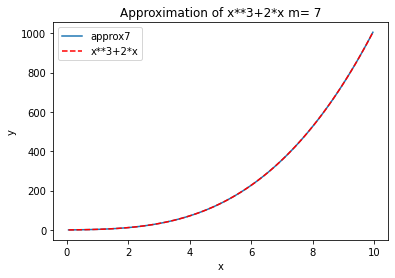

mean of statistic error:  3.2793549072249546e-14





polyfit             8             7             6            5             4
1.358e-19 x - 4.288e-19 x - 1.249e-16 x + 2.77e-15 x - 2.552e-14 x
      3             2
 + 1 x - 2.598e-13 x + 2 x - 6.253e-14


 my algorithm:             8             7             6             5             4
-1.819e-12 x + 2.183e-11 x - 3.492e-09 x + 9.313e-09 x - 1.788e-07 x
      3             2
 + 1 x + 2.086e-07 x + 2 x


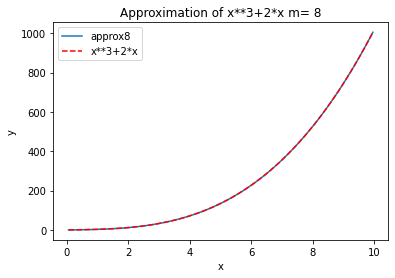

mean of statistic error:  1.0423105153850216e-14





polyfit              9             8             7             6             5
-1.438e-18 x + 7.522e-17 x - 1.653e-15 x + 1.992e-14 x - 1.436e-13 x
              4     3            2
 + 6.346e-13 x + 1 x + 2.52e-12 x + 2 x + 4.235e-13


 my algorithm:            9             8             7             6             5
4.093e-12 x - 5.675e-10 x + 3.725e-09 x - 1.192e-07 x + 6.557e-07 x
              4     3             2
 - 2.861e-06 x + 1 x - 4.768e-06 x + 2 x - 4.768e-07


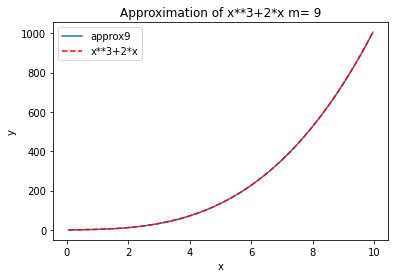

mean of statistic error:  4.5175837248290286e-14





polyfit              10             9             8             7             6
-1.973e-19 x  + 1.103e-17 x - 2.607e-16 x + 3.387e-15 x - 2.632e-14 x
              5             4     3             2
 + 1.243e-13 x - 3.444e-13 x + 1 x - 2.528e-13 x + 2 x + 1.137e-14


 my algorithm:             10             9             8             7             6
-2.774e-11 x  + 1.368e-09 x - 2.468e-08 x + 5.364e-07 x - 2.861e-06 x
              5             4     3             2
 + 1.144e-05 x - 3.529e-05 x + 1 x - 0.0001202 x + 2 x - 2.921e-06


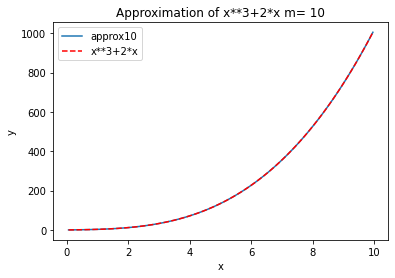

mean of statistic error:  5.151898264506316e-15





polyfit              11         10             9             8            7
-6.369e-20 x  + 4e-18 x  - 1.093e-16 x + 1.707e-15 x - 1.68e-14 x
              6             5             4     3             2
 + 1.083e-13 x - 4.606e-13 x + 1.266e-12 x + 1 x + 2.047e-12 x + 2 x


 my algorithm:            11             10             8             7             5
1.455e-11 x  - 4.657e-10 x  - 1.192e-07 x + 5.722e-06 x + 6.104e-05 x
              4     3             2
 - 0.0001831 x + 1 x - 0.0002441 x + 2 x


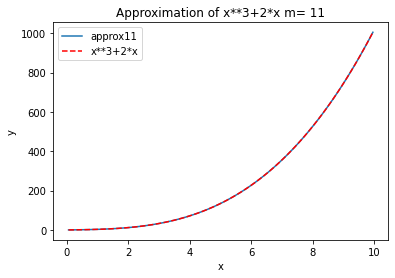

mean of statistic error:  2.3323078460442964e-14


In [69]:

ComparePrecisionPolyFit(lambda x:(x**3+2*x), 1, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x:(x**3+2*x), 2, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x:(x**3+2*x), 3, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x:(x**3+2*x), 4, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x:(x**3+2*x), 5, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x:(x**3+2*x), 6, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x:(x**3+2*x), 7, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x:(x**3+2*x), 8, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x:(x**3+2*x), 9, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x:(x**3+2*x), 10, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x:(x**3+2*x), 11, "x**3+2*x")

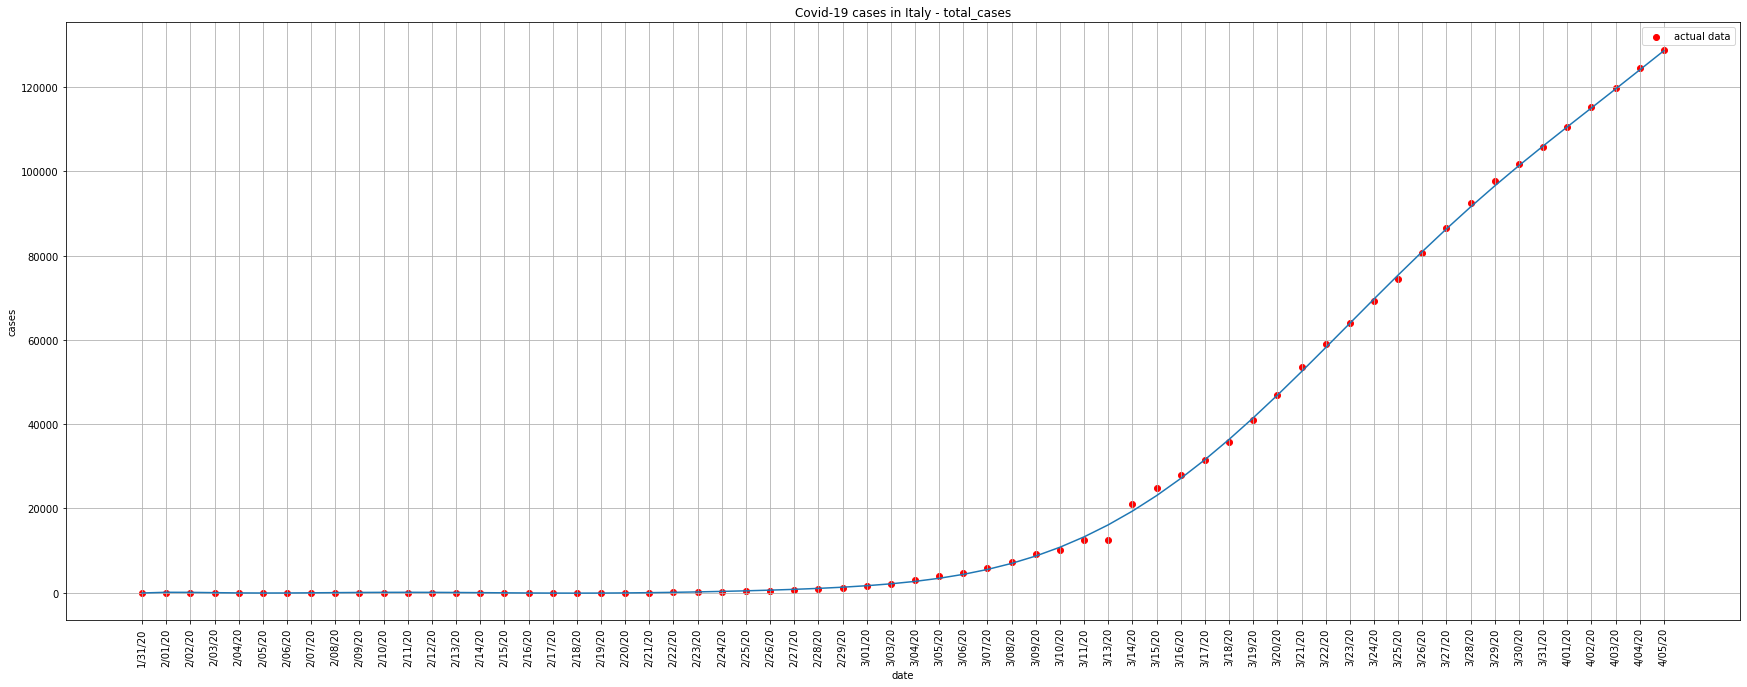

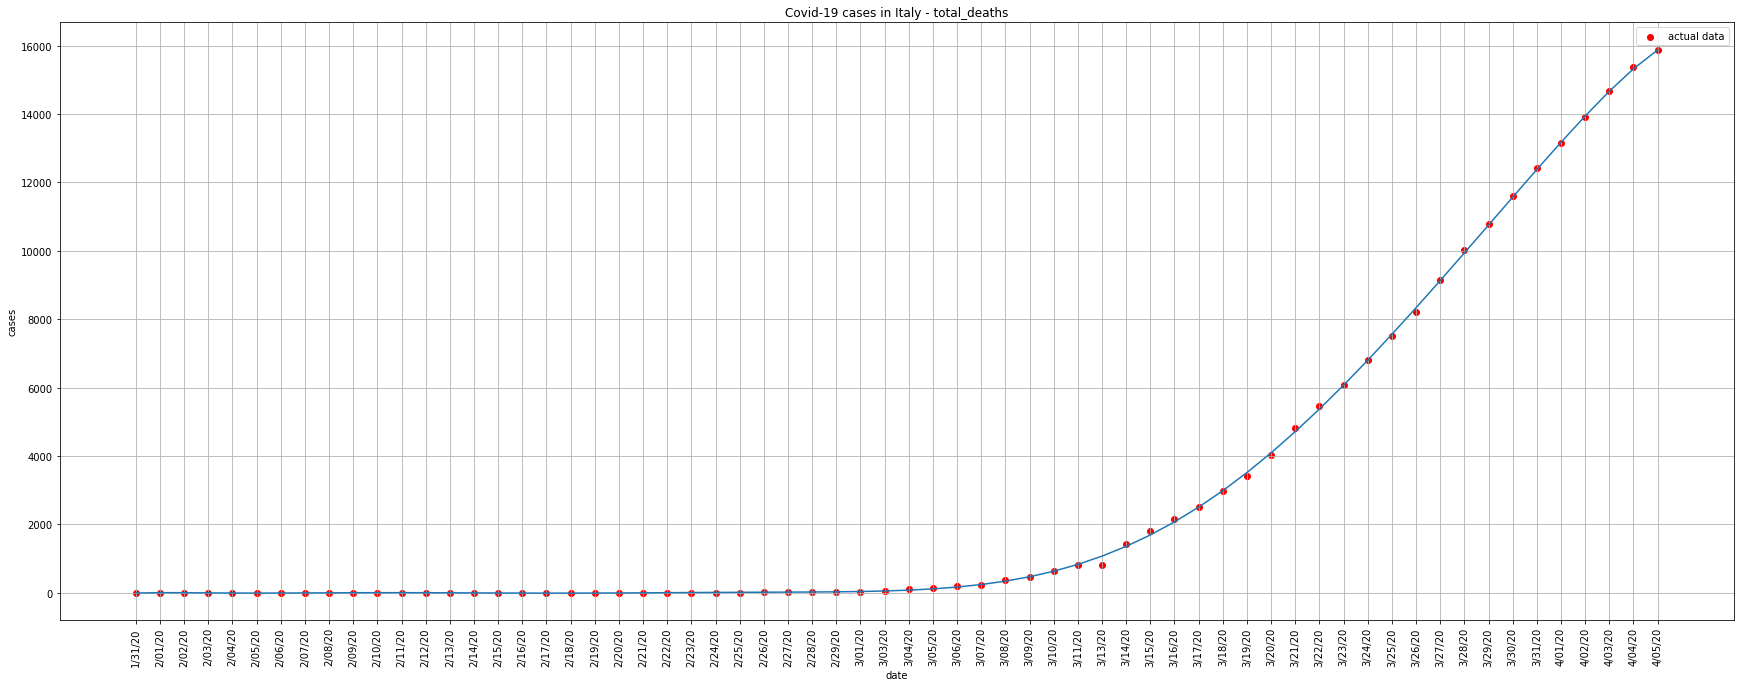

In [70]:
from matplotlib.pyplot import figure
import requests
import json
from contextlib import closing
import csv
import numpy as np
def approximate_corona_curve_italy_polyfit(m, type):
  response = requests.get('https://api.thevirustracker.com/free-api?countryTimeline=IT')
  data = json.loads(response.text)
  data = data['timelineitems'][0]
  length = len(data)
  counter = 0
  x_val = []
  y_val= []
  for i in data:
        if counter < length - 1:
            y_val.append(data[str(i)][type])
            x_val.append(i)
        counter += 1

  unique, rev = np.unique(x_val, return_inverse=True)
  n = len(y_val)
  poly = np.polyfit(np.linspace(1, n, n),y_val,  m)
  results = poly(np.linspace(1, n, n))

  fig,ax=plt.subplots()
  fig.set_size_inches(30, 11)
  ax.plot(rev,results)
  ax.scatter(rev, y_val, c = "red", label="actual data")
  ax.set_xticks(range(len(unique)))
  ax.set_xticklabels(unique)
  plt.title('Covid-19 cases in Italy - ' +type)
  plt.xticks(rotation=90)
  plt.xlabel('date')
  plt.grid(True, which='major')
  plt.ylabel('cases')
  plt.legend()
  plt.show()

approximate_corona_curve_italy(10, "total_cases")
approximate_corona_curve_italy(10, "total_deaths")

## **Scipy curve_fit**

In [0]:
from scipy.optimize import curve_fit
import statistics
import statistics
def ComparePrecisionCurveFit(fx, m, label):
  points = getPoints(100)
  val_x = np.array(np.linspace(0, 11, 100))
  popt, pcov = curve_fit(fx, val_x, lookupTab(fx,100))
  poly = np.poly1d(popt)
  print("curve_fit ", poly)
  polym = least_squares_aproxy(lookupTab(fx,100), val_x, m)
  print("\n\n my algorithm:", polym)
  results =  poly(points)
  error = (len(points)) *[0]
  for i in range(0, len(fx(points))):
    error[i] = abs(results[i] - fx((points)[i]))/abs(fx((points)[i]))
 
  plt.plot(points, results, label ='approx' + str(m))
  plt.plot(points, fx(points), 'r--', label=label)
  plt.title('Approximation of ' + label+ ' m= '+ str(m))
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()
  print('\033[1m' +"mean of statistic error: ",statistics.mean(error))
  x = np.array(np.linspace(0, 11, 100))

polyfit   
-0.05971 x + 0.4129


 my algorithm:  
-0.05971 x + 0.4129


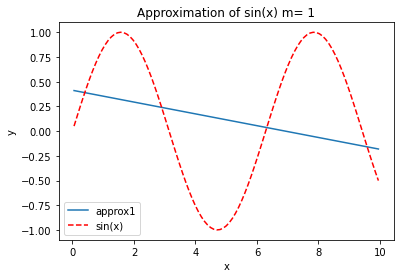

mean of statistic error:  1.1605520045864162





polyfit            2
0.006107 x - 0.1269 x + 0.5348


 my algorithm:           2
0.006107 x - 0.1269 x + 0.5348


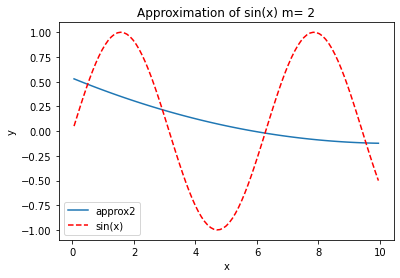

mean of statistic error:  1.1524650311838691





polyfit            3          2
-0.01361 x + 0.2307 x - 1.11 x + 1.414


 my algorithm:           3          2
-0.01361 x + 0.2307 x - 1.11 x + 1.414


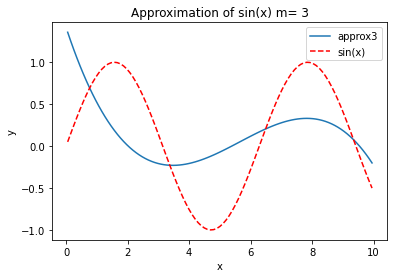

mean of statistic error:  1.2977130756613076





polyfit            4          3         2
-0.00588 x + 0.1158 x - 0.681 x + 1.093 x + 0.2569


 my algorithm:           4          3         2
-0.00588 x + 0.1158 x - 0.681 x + 1.093 x + 0.2569


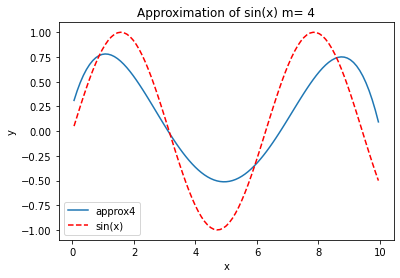

mean of statistic error:  1.118482550694416





polyfit            5           4          3         2
0.001606 x - 0.05004 x + 0.5464 x - 2.445 x + 3.809 x - 0.6692


 my algorithm:           5           4          3         2
0.001606 x - 0.05004 x + 0.5464 x - 2.445 x + 3.809 x - 0.6692


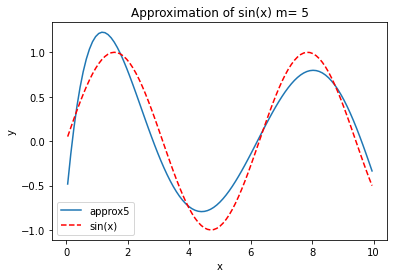

mean of statistic error:  0.6770295936083826





polyfit             6            5           4          3          2
0.0003262 x - 0.009158 x + 0.08425 x - 0.2372 x - 0.3156 x + 1.536 x - 0.1333


 my algorithm:            6            5           4          3          2
0.0003262 x - 0.009158 x + 0.08425 x - 0.2372 x - 0.3156 x + 1.536 x - 0.1333


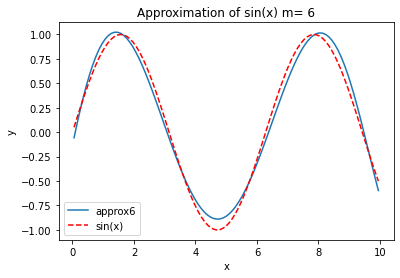

mean of statistic error:  0.261485648626025





polyfit              7           6           5          4         3         2
-5.413e-05 x + 0.00241 x - 0.04085 x + 0.3253 x - 1.193 x + 1.544 x + 0.08107 x + 0.1141


 my algorithm:             7           6           5          4         3         2
-5.413e-05 x + 0.00241 x - 0.04085 x + 0.3253 x - 1.193 x + 1.544 x + 0.08107 x + 0.1141


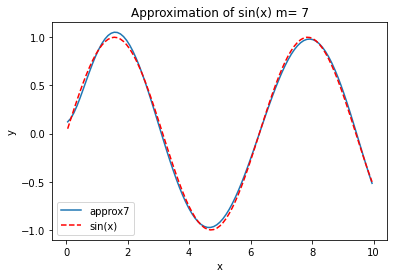

mean of statistic error:  0.1035599040397347





polyfit              8             7            6           5           4
-7.521e-06 x + 0.0002768 x - 0.003528 x + 0.01496 x + 0.03212 x
           3          2
 - 0.3436 x + 0.2996 x + 0.8227 x + 0.02035


 my algorithm:             8             7            6           5           4
-7.521e-06 x + 0.0002768 x - 0.003528 x + 0.01496 x + 0.03212 x
           3          2
 - 0.3436 x + 0.2996 x + 0.8227 x + 0.02035


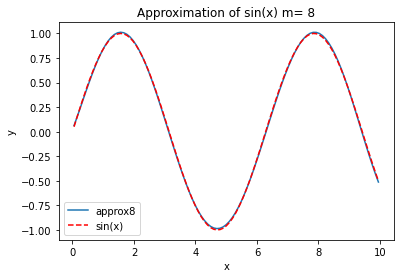

mean of statistic error:  0.04304357335174295





polyfit             9             8            7           6           5
9.156e-07 x - 5.284e-05 x + 0.001214 x - 0.01403 x + 0.08388 x
           4          3          2
 - 0.2362 x + 0.2524 x - 0.3819 x + 1.141 x - 0.01018


 my algorithm:            9             8            7           6          5
9.158e-07 x - 5.285e-05 x + 0.001214 x - 0.01403 x + 0.0839 x
           4          3          2
 - 0.2363 x + 0.2525 x - 0.3821 x + 1.141 x - 0.01019


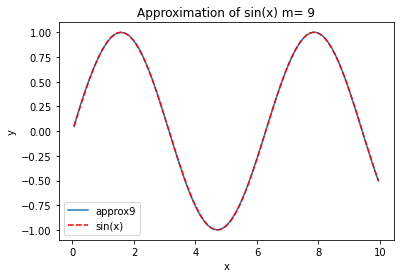

mean of statistic error:  0.008723327499382753





polyfit            10             9             8             7            6
9.78e-08 x  - 4.463e-06 x + 7.316e-05 x - 0.0004248 x - 0.001088 x
           5           4           3           2
 + 0.0203 x - 0.04419 x - 0.08573 x - 0.07175 x + 1.025 x - 0.001597


 my algorithm:           10             9             8             7            6
9.78e-08 x  - 4.464e-06 x + 7.317e-05 x - 0.0004249 x - 0.001087 x
            5           4           3          2
 + 0.02029 x - 0.04417 x - 0.08578 x - 0.0717 x + 1.025 x - 0.001594


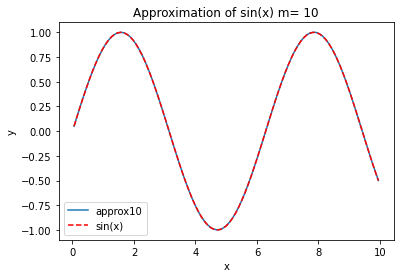

mean of statistic error:  0.002782082843559728





polyfit              11             10             9             8            7
-9.466e-09 x  + 6.705e-07 x  - 1.945e-05 x + 0.0002953 x - 0.002475 x
            6           5           4          3           2
 + 0.01112 x - 0.02669 x + 0.06952 x - 0.2486 x + 0.05067 x + 0.9873 x + 0.0005549


 my algorithm:             11             10             9             8            7
-1.012e-08 x  + 7.104e-07 x  - 2.051e-05 x + 0.0003113 x - 0.002626 x
            6           5           4         3           2
 + 0.01204 x - 0.03032 x + 0.07858 x - 0.262 x + 0.06121 x + 0.9839 x + 0.0007687


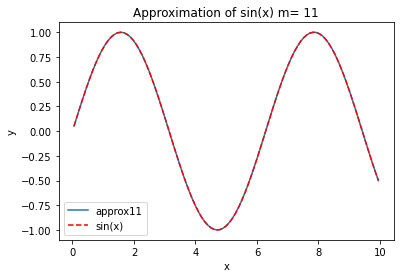

mean of statistic error:  0.0006052177902911153







In [72]:
ComparePrecisionPolyFit(lambda x: np.sin(x), 1, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 2, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 3, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 4, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 5, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 6, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 7, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 8, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 9, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 10, "sin(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sin(x), 11, "sin(x)")
print("\n\n\n\n")

polyfit   
0.2433 x + 0.8665


 my algorithm:  
0.2433 x + 0.8665


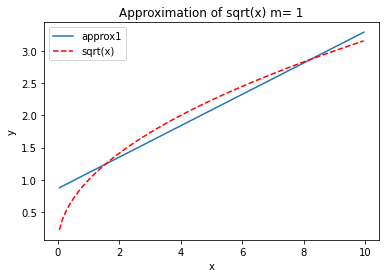

mean of statistic error:  0.11417450084894797





polyfit            2
-0.01638 x + 0.4235 x + 0.5395


 my algorithm:           2
-0.01638 x + 0.4235 x + 0.5395


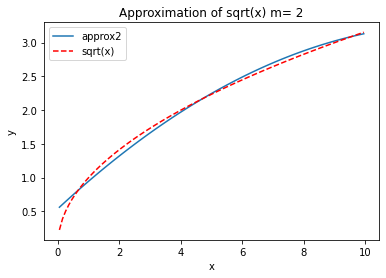

mean of statistic error:  0.04955432315487595





polyfit            3          2
0.002456 x - 0.0569 x + 0.6009 x + 0.381


 my algorithm:           3          2
0.002456 x - 0.0569 x + 0.6009 x + 0.381


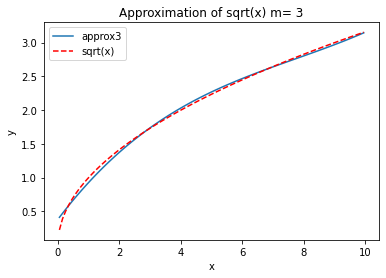

mean of statistic error:  0.02781587139571489





polyfit              4          3          2
-0.0004928 x + 0.0133 x - 0.1333 x + 0.7855 x + 0.2841


 my algorithm:             4          3          2
-0.0004928 x + 0.0133 x - 0.1333 x + 0.7855 x + 0.2841


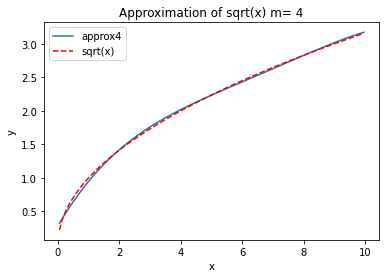

mean of statistic error:  0.01793556446345362





polyfit             5            4           3          2
0.0001158 x - 0.003678 x + 0.04437 x - 0.2605 x + 0.9815 x + 0.2173


 my algorithm:            5            4           3          2
0.0001158 x - 0.003678 x + 0.04437 x - 0.2605 x + 0.9815 x + 0.2173


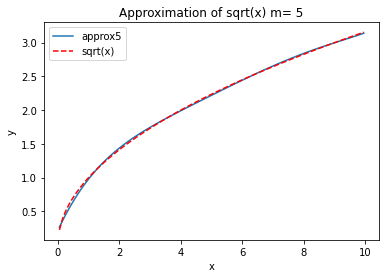

mean of statistic error:  0.013105415536199937





polyfit              6            5           4          3          2
-3.002e-05 x + 0.001106 x - 0.01604 x + 0.1165 x - 0.4565 x + 1.191 x + 0.1679


 my algorithm:             6            5           4          3          2
-3.002e-05 x + 0.001106 x - 0.01604 x + 0.1165 x - 0.4565 x + 1.191 x + 0.1679


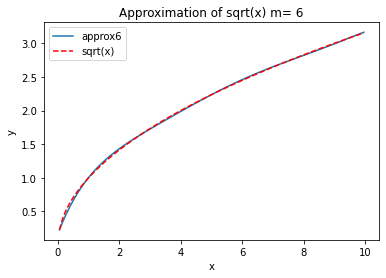

mean of statistic error:  0.009706682100977209





polyfit             7            6            5           4          3
8.285e-06 x - 0.000349 x + 0.005957 x - 0.05294 x + 0.2628 x
           2
 - 0.7412 x + 1.413 x + 0.1301


 my algorithm:            7            6            5           4          3
8.285e-06 x - 0.000349 x + 0.005957 x - 0.05294 x + 0.2628 x
           2
 - 0.7412 x + 1.413 x + 0.1301


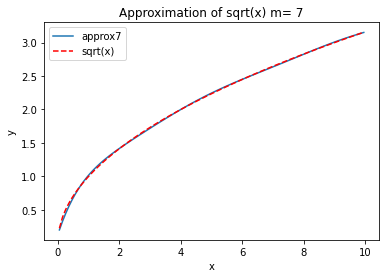

mean of statistic error:  0.00932203233890132





polyfit              8             7            6           5          4
-2.383e-06 x + 0.0001132 x - 0.002231 x + 0.02364 x - 0.1458 x
           3         2
 + 0.5321 x - 1.136 x + 1.648 x + 0.1004


 my algorithm:             8             7            6           5          4
-2.383e-06 x + 0.0001132 x - 0.002231 x + 0.02364 x - 0.1459 x
           3         2
 + 0.5321 x - 1.136 x + 1.648 x + 0.1004


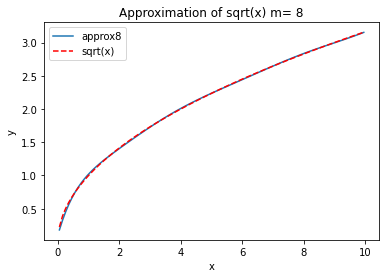

mean of statistic error:  0.008912919192530018





polyfit             9             8             7           6           5
7.044e-07 x - 3.725e-05 x + 0.0008343 x - 0.01031 x + 0.07667 x
           4          3        2
 - 0.3523 x + 0.9906 x - 1.66 x + 1.893 x + 0.07689


 my algorithm:            9             8             7           6           5
7.046e-07 x - 3.726e-05 x + 0.0008345 x - 0.01031 x + 0.07669 x
           4          3        2
 - 0.3524 x + 0.9908 x - 1.66 x + 1.894 x + 0.07688


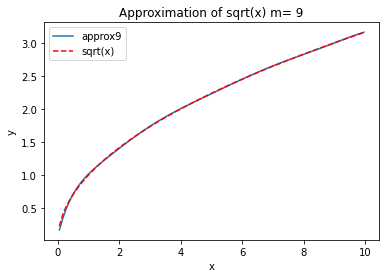

mean of statistic error:  0.008356836355254114





polyfit              10             9             8            7           6
-2.118e-07 x  + 1.236e-05 x - 0.0003102 x + 0.004384 x - 0.03833 x
           5          4         3         2
 + 0.2144 x - 0.7683 x + 1.723 x - 2.332 x + 2.146 x + 0.0583


 my algorithm:             10            9             8            7           6
-2.125e-07 x  + 1.24e-05 x - 0.0003111 x + 0.004397 x - 0.03843 x
           5          4         3         2
 + 0.2149 x - 0.7699 x + 1.726 x - 2.335 x + 2.147 x + 0.05821


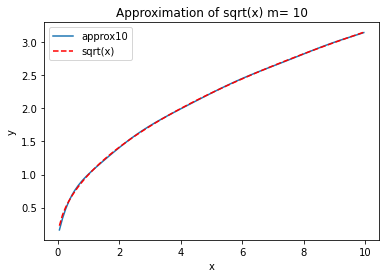

mean of statistic error:  0.007782097173278155





polyfit             11             10             9            8           7
6.437e-08 x  - 4.106e-06 x  + 0.0001143 x - 0.001821 x + 0.01833 x
           6          5         4        3         2
 - 0.1214 x + 0.5339 x - 1.542 x + 2.83 x - 3.164 x + 2.401 x + 0.04367


 my algorithm:            11             10             9            8           7
6.894e-08 x  - 4.387e-06 x  + 0.0001217 x - 0.001933 x + 0.01939 x
           6          5         4         3         2
 - 0.1278 x + 0.5595 x - 1.606 x + 2.925 x - 3.239 x + 2.425 x + 0.04215


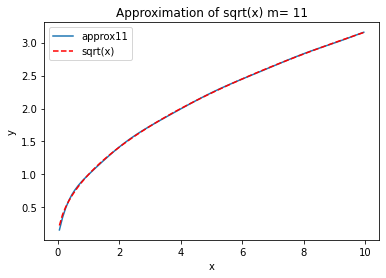

mean of statistic error:  0.00715471129644533







In [73]:
ComparePrecisionPolyFit(lambda x: np.sqrt(x), 1, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 2, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 3, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 4, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 5, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 6, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 7, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 8, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 9, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 10, "sqrt(x)")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: np.sqrt(x), 11, "sqrt(x)")
print("\n\n\n\n")

polyfit   
111.3 x - 264.8


 my algorithm:  
111.3 x - 264.8


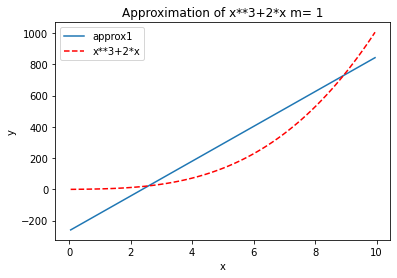

mean of statistic error:  51.55841132051459





polyfit        2
16.5 x - 70.24 x + 64.55


 my algorithm:       2
16.5 x - 70.24 x + 64.55


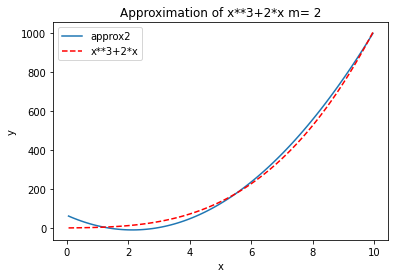

mean of statistic error:  10.639714333636476





polyfit     3             2
1 x + 1.822e-14 x + 2 x + 1.368e-13


 my algorithm:    3             2
1 x + 1.819e-12 x + 2 x + 7.276e-12


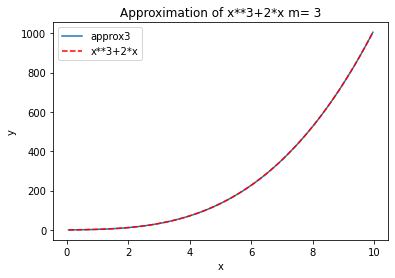

mean of statistic error:  2.3735270188109984e-14





polyfit             4     3            2
2.902e-16 x + 1 x + 3.67e-14 x + 2 x + 2.274e-14


 my algorithm:    3             2
1 x + 1.455e-11 x + 2 x - 1.455e-11


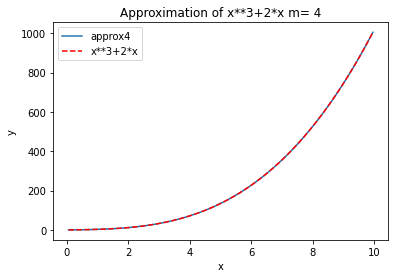

mean of statistic error:  4.208492123754354e-15





polyfit             5             4     3             2
-2.69e-17 x + 5.585e-16 x + 1 x + 2.189e-14 x + 2 x + 1.08e-13


 my algorithm:            5             4     3             2
1.137e-13 x - 1.091e-11 x + 1 x - 2.328e-10 x + 2 x - 1.164e-10


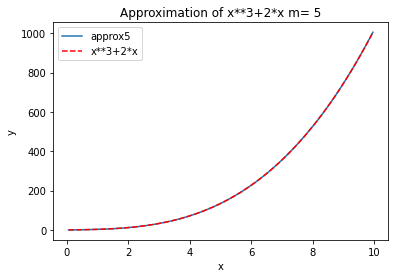

mean of statistic error:  2.7786937309360384e-14





polyfit             6             5             4     3             2
3.461e-17 x - 1.273e-15 x + 1.802e-14 x + 1 x + 4.081e-13 x + 2 x + 1.876e-13


 my algorithm:            6             5             4     3
1.137e-13 x - 1.455e-11 x - 5.821e-11 x + 1 x + 2 x + 1.164e-09


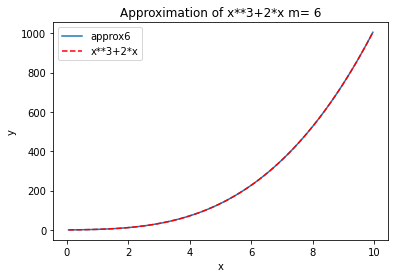

mean of statistic error:  2.451762688522995e-14





polyfit             7             6             5             4     3
3.628e-18 x - 1.226e-16 x + 1.574e-15 x - 9.644e-15 x + 1 x
              2
 - 3.712e-14 x + 2 x + 1.592e-13


 my algorithm:            7             6             5             4     3
4.547e-13 x - 1.455e-11 x + 4.657e-10 x + 1.863e-09 x + 1 x
             2
 - 1.49e-08 x + 2 x - 1.863e-09


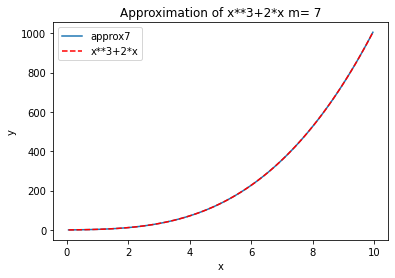

mean of statistic error:  3.2793549072249546e-14





polyfit             8             7             6            5             4
1.358e-19 x - 4.288e-19 x - 1.249e-16 x + 2.77e-15 x - 2.552e-14 x
      3             2
 + 1 x - 2.598e-13 x + 2 x - 6.253e-14


 my algorithm:             8             7             6             5             4
-1.819e-12 x + 2.183e-11 x - 3.492e-09 x + 9.313e-09 x - 1.788e-07 x
      3             2
 + 1 x + 2.086e-07 x + 2 x


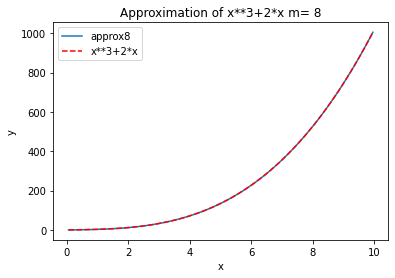

mean of statistic error:  1.0423105153850216e-14





polyfit              9             8             7             6             5
-1.438e-18 x + 7.522e-17 x - 1.653e-15 x + 1.992e-14 x - 1.436e-13 x
              4     3            2
 + 6.346e-13 x + 1 x + 2.52e-12 x + 2 x + 4.235e-13


 my algorithm:            9             8             7             6             5
4.093e-12 x - 5.675e-10 x + 3.725e-09 x - 1.192e-07 x + 6.557e-07 x
              4     3             2
 - 2.861e-06 x + 1 x - 4.768e-06 x + 2 x - 4.768e-07


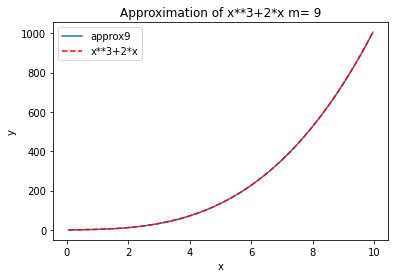

mean of statistic error:  4.5175837248290286e-14





polyfit              10             9             8             7             6
-1.973e-19 x  + 1.103e-17 x - 2.607e-16 x + 3.387e-15 x - 2.632e-14 x
              5             4     3             2
 + 1.243e-13 x - 3.444e-13 x + 1 x - 2.528e-13 x + 2 x + 1.137e-14


 my algorithm:             10             9             8             7             6
-2.774e-11 x  + 1.368e-09 x - 2.468e-08 x + 5.364e-07 x - 2.861e-06 x
              5             4     3             2
 + 1.144e-05 x - 3.529e-05 x + 1 x - 0.0001202 x + 2 x - 2.921e-06


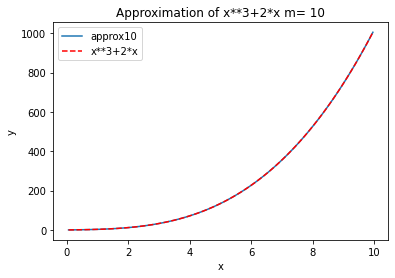

mean of statistic error:  5.151898264506316e-15





polyfit              11         10             9             8            7
-6.369e-20 x  + 4e-18 x  - 1.093e-16 x + 1.707e-15 x - 1.68e-14 x
              6             5             4     3             2
 + 1.083e-13 x - 4.606e-13 x + 1.266e-12 x + 1 x + 2.047e-12 x + 2 x


 my algorithm:            11             10             8             7             5
1.455e-11 x  - 4.657e-10 x  - 1.192e-07 x + 5.722e-06 x + 6.104e-05 x
              4     3             2
 - 0.0001831 x + 1 x - 0.0002441 x + 2 x


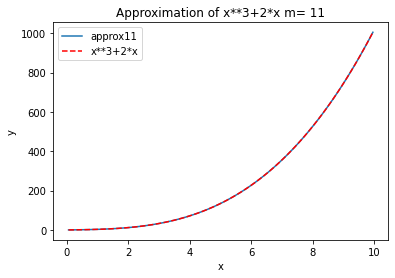

mean of statistic error:  2.3323078460442964e-14







In [74]:
ComparePrecisionPolyFit(lambda x: (x**3+2*x), 1, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: (x**3+2*x), 2, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: (x**3+2*x), 3, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: (x**3+2*x), 4, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: (x**3+2*x), 5, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: (x**3+2*x), 6, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: (x**3+2*x), 7, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: (x**3+2*x), 8, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: (x**3+2*x), 9, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: (x**3+2*x), 10, "x**3+2*x")
print("\n\n\n\n")

ComparePrecisionPolyFit(lambda x: (x**3+2*x), 11, "x**3+2*x")
print("\n\n\n\n")